In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd

# Loading the Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Prototype/Updated_Plant_Health(new).csv")
df

,Time,Soil_Moisture (%),Light_Intensity (%),Light Damage,Overwatering
0,2025-04-15 06:00:00 UTC,100.000000,0.000000,0,0
1,2025-04-15 06:03:36 UTC,99.292929,1.010101,0,0
2,2025-04-15 06:07:12 UTC,98.585859,2.020202,0,0
3,2025-04-15 06:10:48 UTC,97.878788,3.030303,0,0
4,2025-04-15 06:14:24 UTC,97.171717,4.040404,0,0
...,...,...,...,...,...
95,2025-04-15 11:42:00 UTC,32.828283,95.959596,1,1
96,2025-04-15 11:45:36 UTC,32.121212,96.969697,1,1
97,2025-04-15 11:49:12 UTC,31.414141,97.979798,1,1
98,2025-04-15 11:52:48 UTC,30.707071,98.989899,1,1


# Viewing the First Few Records

In [4]:
df.head()

,Time,Soil_Moisture (%),Light_Intensity (%),Light Damage,Overwatering
0,2025-04-15 06:00:00 UTC,100.000000,0.000000,0,0
1,2025-04-15 06:03:36 UTC,99.292929,1.010101,0,0
2,2025-04-15 06:07:12 UTC,98.585859,2.020202,0,0
3,2025-04-15 06:10:48 UTC,97.878788,3.030303,0,0
4,2025-04-15 06:14:24 UTC,97.171717,4.040404,0,0


# Viewing the Last Few Records

In [5]:
df.tail()

,Time,Soil_Moisture (%),Light_Intensity (%),Light Damage,Overwatering
95,2025-04-15 11:42:00 UTC,32.828283,95.959596,1,1
96,2025-04-15 11:45:36 UTC,32.121212,96.969697,1,1
97,2025-04-15 11:49:12 UTC,31.414141,97.979798,1,1
98,2025-04-15 11:52:48 UTC,30.707071,98.989899,1,1
99,2025-04-15 11:56:24 UTC,30.000000,100.000000,1,1


# Summary Statistics of the Dataset

In [6]:
df.describe()

,Soil_Moisture (%),Light_Intensity (%),Light Damage,Overwatering
count,100.000000,100.000000,100.000000,100.000000
mean,65.000000,50.000000,0.200000,0.200000
std,20.513176,29.304537,0.402015,0.402015
min,30.000000,0.000000,0.000000,0.000000
25%,47.500000,25.000000,0.000000,0.000000
50%,65.000000,50.000000,0.000000,0.000000
75%,82.500000,75.000000,0.000000,0.000000
max,100.000000,100.000000,1.000000,1.000000


# Dataset Information (column types, non-null counts)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 100 non-null    object 
 1   Soil_Moisture (%)    100 non-null    float64
 2   Light_Intensity (%)  100 non-null    float64
 3   Light Damage         100 non-null    int64  
 4   Overwatering         100 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


# Data Types of Each Column

In [8]:
df.dtypes

,0
Time,object
Soil_Moisture (%),float64
Light_Intensity (%),float64
Light Damage,int64
Overwatering,int64


# Checking for Missing Values

In [9]:
df.isnull().sum()

,0
Time,0
Soil_Moisture (%),0
Light_Intensity (%),0
Light Damage,0
Overwatering,0


# Correlation Matrix for Numerical Features

In [10]:
df.corr(numeric_only = True)

,Soil_Moisture (%),Light_Intensity (%),Light Damage,Overwatering
Soil_Moisture (%),1.000000,-1.000000,-0.692855,-0.692855
Light_Intensity (%),-1.000000,1.000000,0.692855,0.692855
Light Damage,-0.692855,0.692855,1.000000,1.000000
Overwatering,-0.692855,0.692855,1.000000,1.000000


# Frequency Distribution of 'Soil_Moisture (%)'

In [11]:
df['Soil_Moisture (%)'].value_counts()

,count
Soil_Moisture (%),
100.000000,1
99.292929,1
98.585859,1
97.878788,1
97.171717,1
...,...
32.828283,1
32.121212,1
31.414141,1


# Creating 'WateringAction' Based on 'Soil_Moisture (%)'

In [ ]:
df['WateringAction'] = df['Soil_Moisture (%)'].apply(
    lambda x: 'Needs Watering' if x < 30 else 'Watered' if x >= 30 and x <= 60 else 'Overwatered'
)


# Converting 'Time' Column to Hour Format

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce').dt.hour

# Mapping 'WateringAction' to Numerical Values

In [14]:
df['WateringAction'] = df['WateringAction'].map({'Needs Watering': 1, 'Watered': 0, 'Overwatered': -1})

In [15]:
df.dtypes

,0
Time,int32
Soil_Moisture (%),float64
Light_Intensity (%),float64
Light Damage,int64
Overwatering,int64
WateringAction,int64


# Converting 'Time' to Integer Type

In [16]:
df['Time'] = df['Time'].astype('int64')

In [48]:
df.dtypes

,0
Time,int64
Soil_Moisture (%),float64
Light_Intensity (%),float64
Light Damage,int64
Overwatering,int64
WateringAction,int64


# Graphs and Visvalization

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

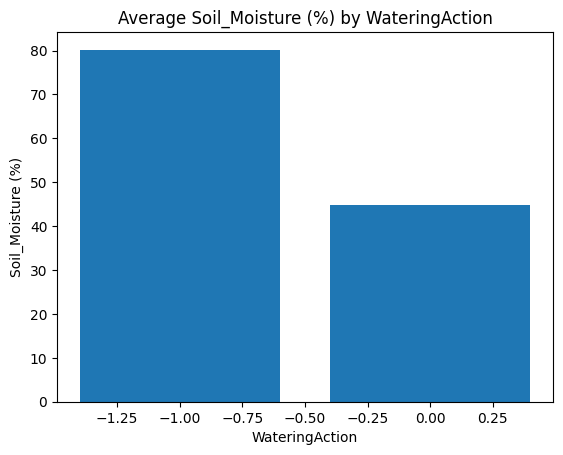

In [56]:
import matplotlib.pyplot as plt

# Choose a column for the x-axis (e.g., 'WateringAction')
x_column = 'WateringAction'

# Choose a column for the y-axis (e.g., 'Soil_Moisture (%)')
y_column = 'Soil_Moisture (%)'

# Group the data and calculate the mean for each group
grouped_data = df.groupby(x_column)[y_column].mean()

# Create the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Average {y_column} by {x_column}')
plt.show()

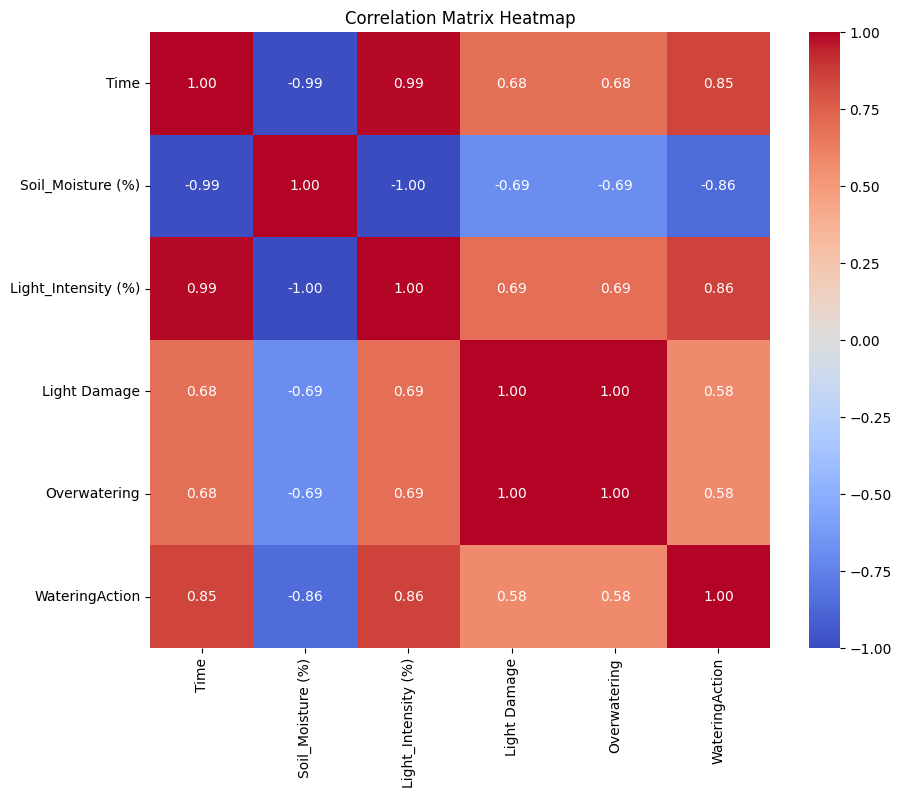

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

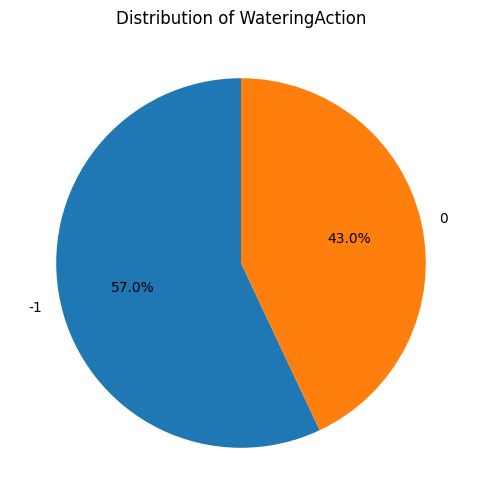

In [55]:
import matplotlib.pyplot as plt

# Choose a column for the pie chart (e.g., 'WateringAction')
column_for_pie = 'WateringAction'

# Get value counts for the chosen column
value_counts = df[column_for_pie].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Distribution of {column_for_pie}')
plt.show()

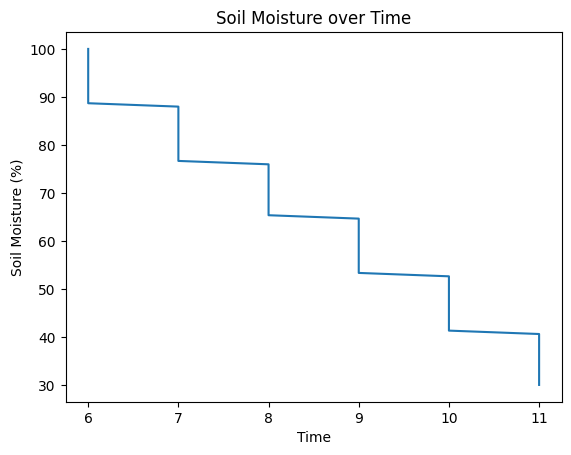

In [53]:
plt.plot(df['Time'], df['Soil_Moisture (%)'])
plt.xlabel('Time')
plt.ylabel('Soil Moisture (%)')
plt.title('Soil Moisture over Time')
plt.show()

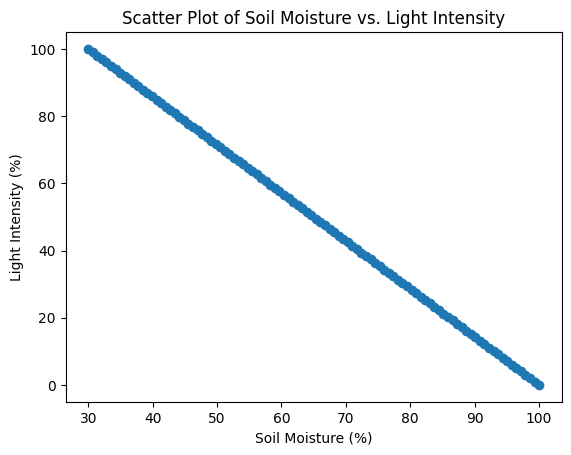

In [58]:
import matplotlib.pyplot as plt
plt.scatter(df['Soil_Moisture (%)'], df['Light_Intensity (%)'])
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Light Intensity (%)')
plt.title('Scatter Plot of Soil Moisture vs. Light Intensity')
plt.show()

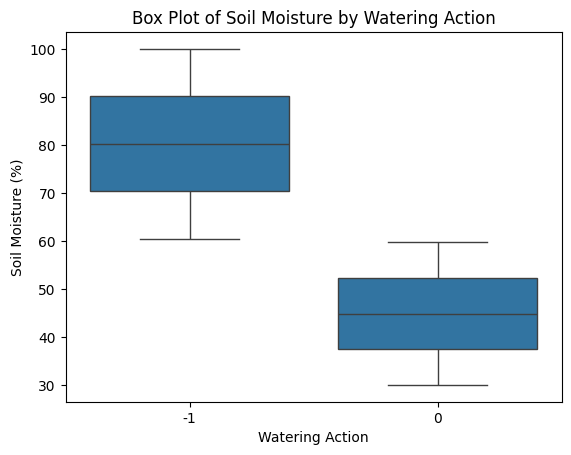

In [62]:
import seaborn as sns
sns.boxplot(x='WateringAction', y='Soil_Moisture (%)', data=df)
plt.xlabel('Watering Action')
plt.ylabel('Soil Moisture (%)')
plt.title('Box Plot of Soil Moisture by Watering Action')
plt.show()

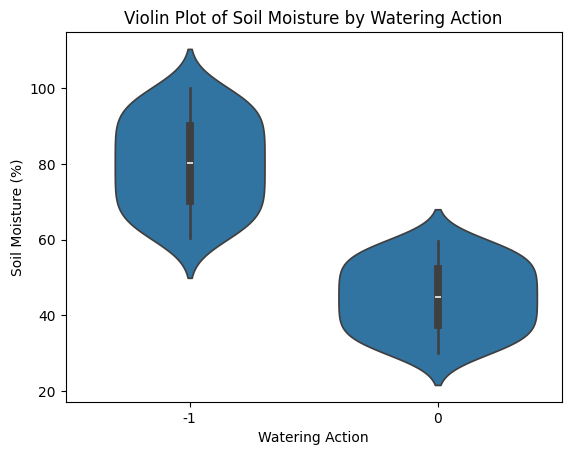

In [63]:
import seaborn as sns
sns.violinplot(x='WateringAction', y='Soil_Moisture (%)', data=df)
plt.xlabel('Watering Action')
plt.ylabel('Soil Moisture (%)')
plt.title('Violin Plot of Soil Moisture by Watering Action')
plt.show()

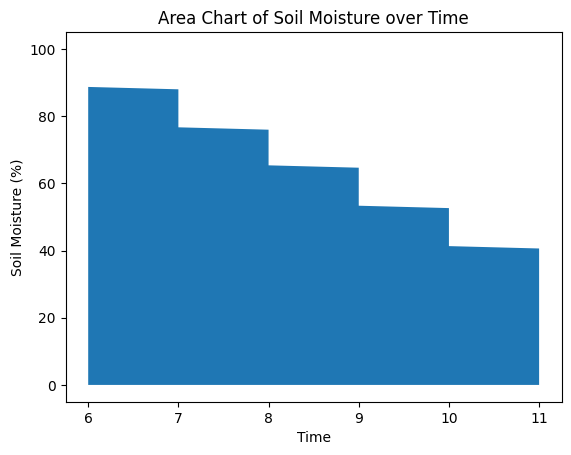

In [65]:
import matplotlib.pyplot as plt
plt.fill_between(df['Time'], df['Soil_Moisture (%)'])
plt.xlabel('Time')
plt.ylabel('Soil Moisture (%)')
plt.title('Area Chart of Soil Moisture over Time')
plt.show()

# Splitting Features (X) and Target (y)

In [ ]:
x = df.drop('Overwatering',axis=1).values
y = df['Overwatering'].values

In [19]:
x

array([[  6.        , 100.        ,   0.        ,   0.        ,
         -1.        ],
       [  6.        ,  99.29292929,   1.01010101,   0.        ,
         -1.        ],
       [  6.        ,  98.58585859,   2.02020202,   0.        ,
         -1.        ],
       [  6.        ,  97.87878788,   3.03030303,   0.        ,
         -1.        ],
       [  6.        ,  97.17171717,   4.04040404,   0.        ,
         -1.        ],
       [  6.        ,  96.46464646,   5.05050505,   0.        ,
         -1.        ],
       [  6.        ,  95.75757576,   6.06060606,   0.        ,
         -1.        ],
       [  6.        ,  95.05050505,   7.07070707,   0.        ,
         -1.        ],
       [  6.        ,  94.34343434,   8.08080808,   0.        ,
         -1.        ],
       [  6.        ,  93.63636364,   9.09090909,   0.        ,
         -1.        ],
       [  6.        ,  92.92929293,  10.1010101 ,   0.        ,
         -1.        ],
       [  6.        ,  92.22222222,  11.111

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Splitting Dataset into Training and Testing Sets

In [21]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [22]:
xtrain.shape

(80, 5)

In [23]:
xtest.shape

(20, 5)

In [24]:
ytrain.shape

(80,)

In [25]:
ytest.shape

(20,)

# Importing Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Model

In [27]:
model = RandomForestClassifier()

# Training the Model

In [28]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

# Making Predictions on Test Data

In [29]:

y_predict = model.predict(xtest)
y_predict

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

# Calculating Model Accuracy

In [30]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ytest,y_predict)
score*100


100.0

# Predicting Again (Optional Repeat)

In [31]:

y_predict = model.predict(xtest)
y_predict

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

# Classification Report

In [32]:
from sklearn.metrics import classification_report

# Assuming y_pred is obtained from a model's prediction
print("\nClassification Report:\n", classification_report(ytest,y_predict))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Cross-Validation for More Robust Accuracy

In [33]:
from sklearn.model_selection import cross_val_score
modelcv = RandomForestClassifier()

# Performing 10-Fold Cross-Validation

In [34]:
sc = cross_val_score(modelcv,x,y,cv=10,scoring="accuracy")

# Mean Accuracy from Cross-Validation

In [35]:
sc.mean()

np.float64(0.96)

# Importing GridSearchCV for Hyperparameter Tuning

In [36]:
from sklearn.model_selection import  GridSearchCV

# Setting Parameters to Tune

In [37]:
tuned_parameters  = {
    'criterion':['gini','entropy'],
    'max_features':[1,2,3,4],
    'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],
    'n_estimators':[10,15]
}

# Creating Base RandomForest Model

In [38]:
model_gscv = RandomForestClassifier()

In [ ]:
# 

In [39]:
model_rf = GridSearchCV(estimator=model_gscv,param_grid=tuned_parameters,cv=10,scoring="accuracy")

In [40]:
model_rf.fit(x,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [10, 15]},
             scoring='accuracy')

In [41]:
print(f"best score:",model_rf.best_score_)

best score: 1.0


In [42]:
print(f"best score:",model_rf.best_params_)

best score: {'criterion': 'gini', 'max_depth': 6, 'max_features': 1, 'n_estimators': 15}


In [71]:
import pickle

In [72]:
filename = 'model.pkl'

In [73]:
pickle.dump(df,open(filename,'wb'))

## serilaize process

In [74]:
## unserilize
df = pickle.load(open(filename,'rb'))

In [75]:
df.head()

,Time,Soil_Moisture (%),Light_Intensity (%),Light Damage,Overwatering,WateringAction
0,6,100.000000,0.000000,0,0,-1
1,6,99.292929,1.010101,0,0,-1
2,6,98.585859,2.020202,0,0,-1
3,6,97.878788,3.030303,0,0,-1
4,6,97.171717,4.040404,0,0,-1
